# Pytorch workflow

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import torch.version

print(torch.__version__)
print(torch.version.cuda)

2.4.0
12.1


## 1. Data (preparing and loading)

In [2]:
# parameters
weight = 0.7
bias = 0.3

# data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

In [4]:
# create a train/test set
train_split = int(len(X) * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    # plot trainning data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    # plot test data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions')

    plt.legend(prop={'size': 12})  

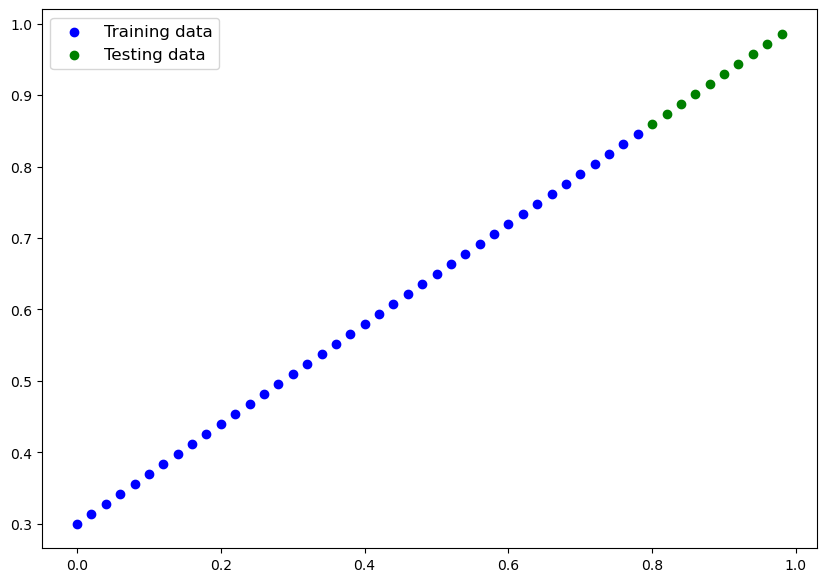

In [6]:
plot_predictions()

## 2. Build model

In [13]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                dtype=torch.float32,
                                                requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float32,
                                             requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
       return self.weights * x + self.bias

### Check the contents of model

In [28]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### Make predictions

In [33]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [35]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

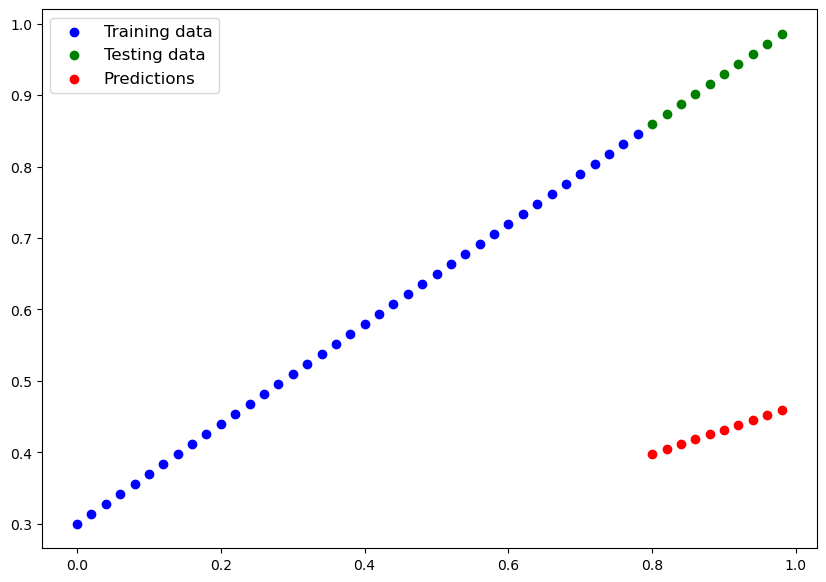

In [36]:
plot_predictions(predictions=y_preds)

## 3. Train model